In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 130 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.6 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638147 sha256=13158df2635db4730db829676d319fa868aec09269746287657f34261d169634
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from fbprophet import Prophet

In [ ]:
df = pd.read_csv('real data.csv', names=['ds', 'y'])
prophet = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=2)
prophet.fit(df)

In [ ]:
# 13개월을 내다보며 예측합니다.
future_data = prophet.make_future_dataframe(periods=13, freq='m')
forecast_data = prophet.predict(future_data)

In [ ]:
forecast_data.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
262,2023-04-30,65.830777,106.133395,108.142981,65.567622,66.096363,0.619812,0.619812,0.619812,0.628241,...,0.000257,0.000257,0.000257,0.008172,0.008172,0.008172,0.0,0.0,0.0,107.188394
263,2023-05-31,65.927050,105.767985,107.794726,65.604797,66.255150,0.619812,0.619812,0.619812,0.619971,...,-0.000056,-0.000056,-0.000056,0.000215,0.000215,0.000215,0.0,0.0,0.0,106.799921
264,2023-06-30,66.020217,105.929811,108.176024,65.606084,66.393864,0.619812,0.619812,0.619812,0.621775,...,0.001671,0.001671,0.001671,0.000291,0.000291,0.000291,0.0,0.0,0.0,107.069948
265,2023-07-31,66.116490,106.345917,108.759537,65.627470,66.562985,0.619812,0.619812,0.619812,0.625783,...,0.000124,0.000124,0.000124,0.005846,0.005846,0.005846,0.0,0.0,0.0,107.491062
266,2023-08-31,66.212763,105.667390,108.181492,65.657444,66.757801,0.619812,0.619812,0.619812,0.614648,...,-0.001656,-0.001656,-0.001656,-0.003509,-0.003509,-0.003509,0.0,0.0,0.0,106.910277


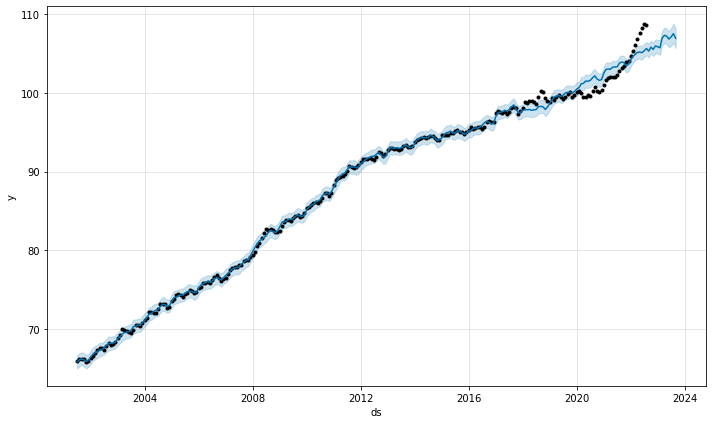

In [ ]:
fig1 = prophet.plot(forecast_data)

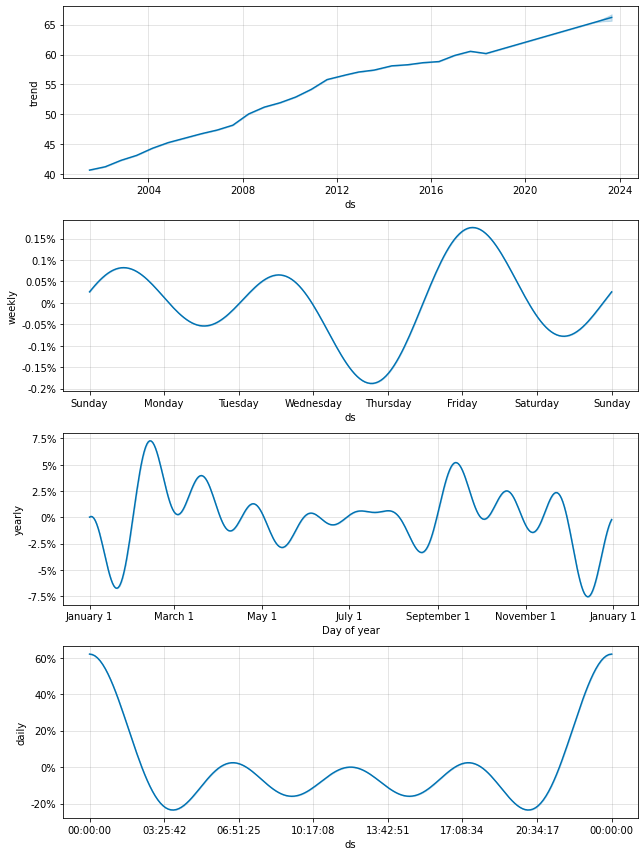

In [ ]:
fig2 = prophet.plot_components(forecast_data)

In [ ]:
y = df.y.values[13:] # 첫 13개월을 제외한 실제 가격 데이터입니다.
y_pred = forecast_data.yhat.values[13:-13] # 첫 13개월, 마지막 13개월을 제외한 예측 가격 데이터입니다.

In [ ]:
rmse = sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(rmse)
print(r2)

0.6709549937955597
0.9961550420979873


In [ ]:
pred_y = forecast_data.yhat.values[-13:] # 마지막 13개월의 예측 데이터입니다. (2022-08-01 ~ 2023-08-01)
pred_y_lower = forecast_data.yhat_lower.values[-13:] # 마지막 13개월의 예측 데이터의 최소값입니다.
pred_y_upper = forecast_data.yhat_upper.values[-13:] # 마지막 13개월의 예측 데이터의 최대값입니다.

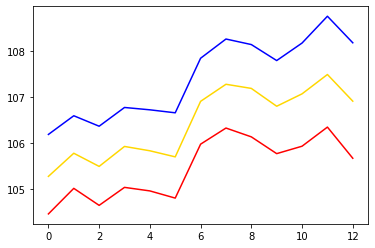

In [ ]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.